In [13]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import matplotlib.pyplot as plt
import pandas as pd
from src.model import BasicModel

plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

class LEARN_INFO:
    def __init__(self, name, columns, is_contain_cluster_label=False, matching_type="general", jump=3):
        self.name = name
        self.columns = columns
        self.is_label = is_contain_cluster_label
        self.matching = matching_type
        self.jump = jump
    

# INPUT_REPORT_SIMULATION = [
#     LEARN_INFO(name="univariate", columns=['energy (kw 15min)'], is_contain_cluster_label=False),
#     LEARN_INFO(name="with cluster label", columns=['energy (kw 15min)'], is_contain_cluster_label=True),
# ]

DEFAULT_COLUMNS = [
    'energy (kw 15min)',
    ['week sin',
    'week cos'],
    ['year sin',
    'year cos'],
    'season idx',
    'weather idx',
    'avg ta',
    'avg rhm'
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
_ = {
    "univariate": ['energy (kw 15min)'],
#     "multivariate (week)": [
#         'energy (kw 15min)',
#         'week sin',
#         'week cos'
#     ],
#     "multivariate (year)": [
#         'energy (kw 15min)',
#         'year sin',
#         'year cos',
#     ],
#     "multivariate (weather)": [
#         'energy (kw 15min)',
#         'weather idx'
#     ],
#     "multivariate (avg ta)": [
#         'energy (kw 15min)',
#         'avg ta'
#     ],
#     "multivariate (avg rhm)": [
#         'energy (kw 15min)',
#         'avg rhm'
#     ],
#     "multivariate (season)": [
#         'energy (kw 15min)',
#         'season idx'
#     ]
}

# Input Report Simulation
IRS = []
    
    
for key in _.keys():
    IRS.append(
        LEARN_INFO(name=key, 
                   columns=_[key], 
                   is_contain_cluster_label=False),
    )

# Training Model Array 
TMA = []

is_switch = False

for _ in IRS:
    bm = BasicModel(name=_.name,
                   columns=_.columns,
                   is_contain_cluster_label=_.is_label,
                   is_switch=is_switch,
                   matching_type=_.matching)
    
    bm.set_window()
    bm.set_model()
    print(bm)
    bm.training(epochs=50)
    
    bm.set_predict(is_reshape=True)
    bm.set_predict(is_reshape=True, is_val_datas=True)
    
    TMA.append(bm)
    
test_evaluate_df = pd.DataFrame();
val_evaluate_df = pd.DataFrame();

for _ in TMA:
    test_evaluate_df = test_evaluate_df.append(_.statistic(), ignore_index=True)
    val_evaluate_df = val_evaluate_df.append(_.statistic(is_val_datas=True), ignore_index=True)
    
test_evaluate_df.index = [_.name for _ in TMA]
val_evaluate_df.index = [_.name for _ in TMA]

###### [Notice] (univariate) set predict (validation) info start ###### 

0 / 91
50 / 91
91 / 91 complete.

###### [Notice] set predict info success ###### 



171 (171, 24)
171 (171, 21)


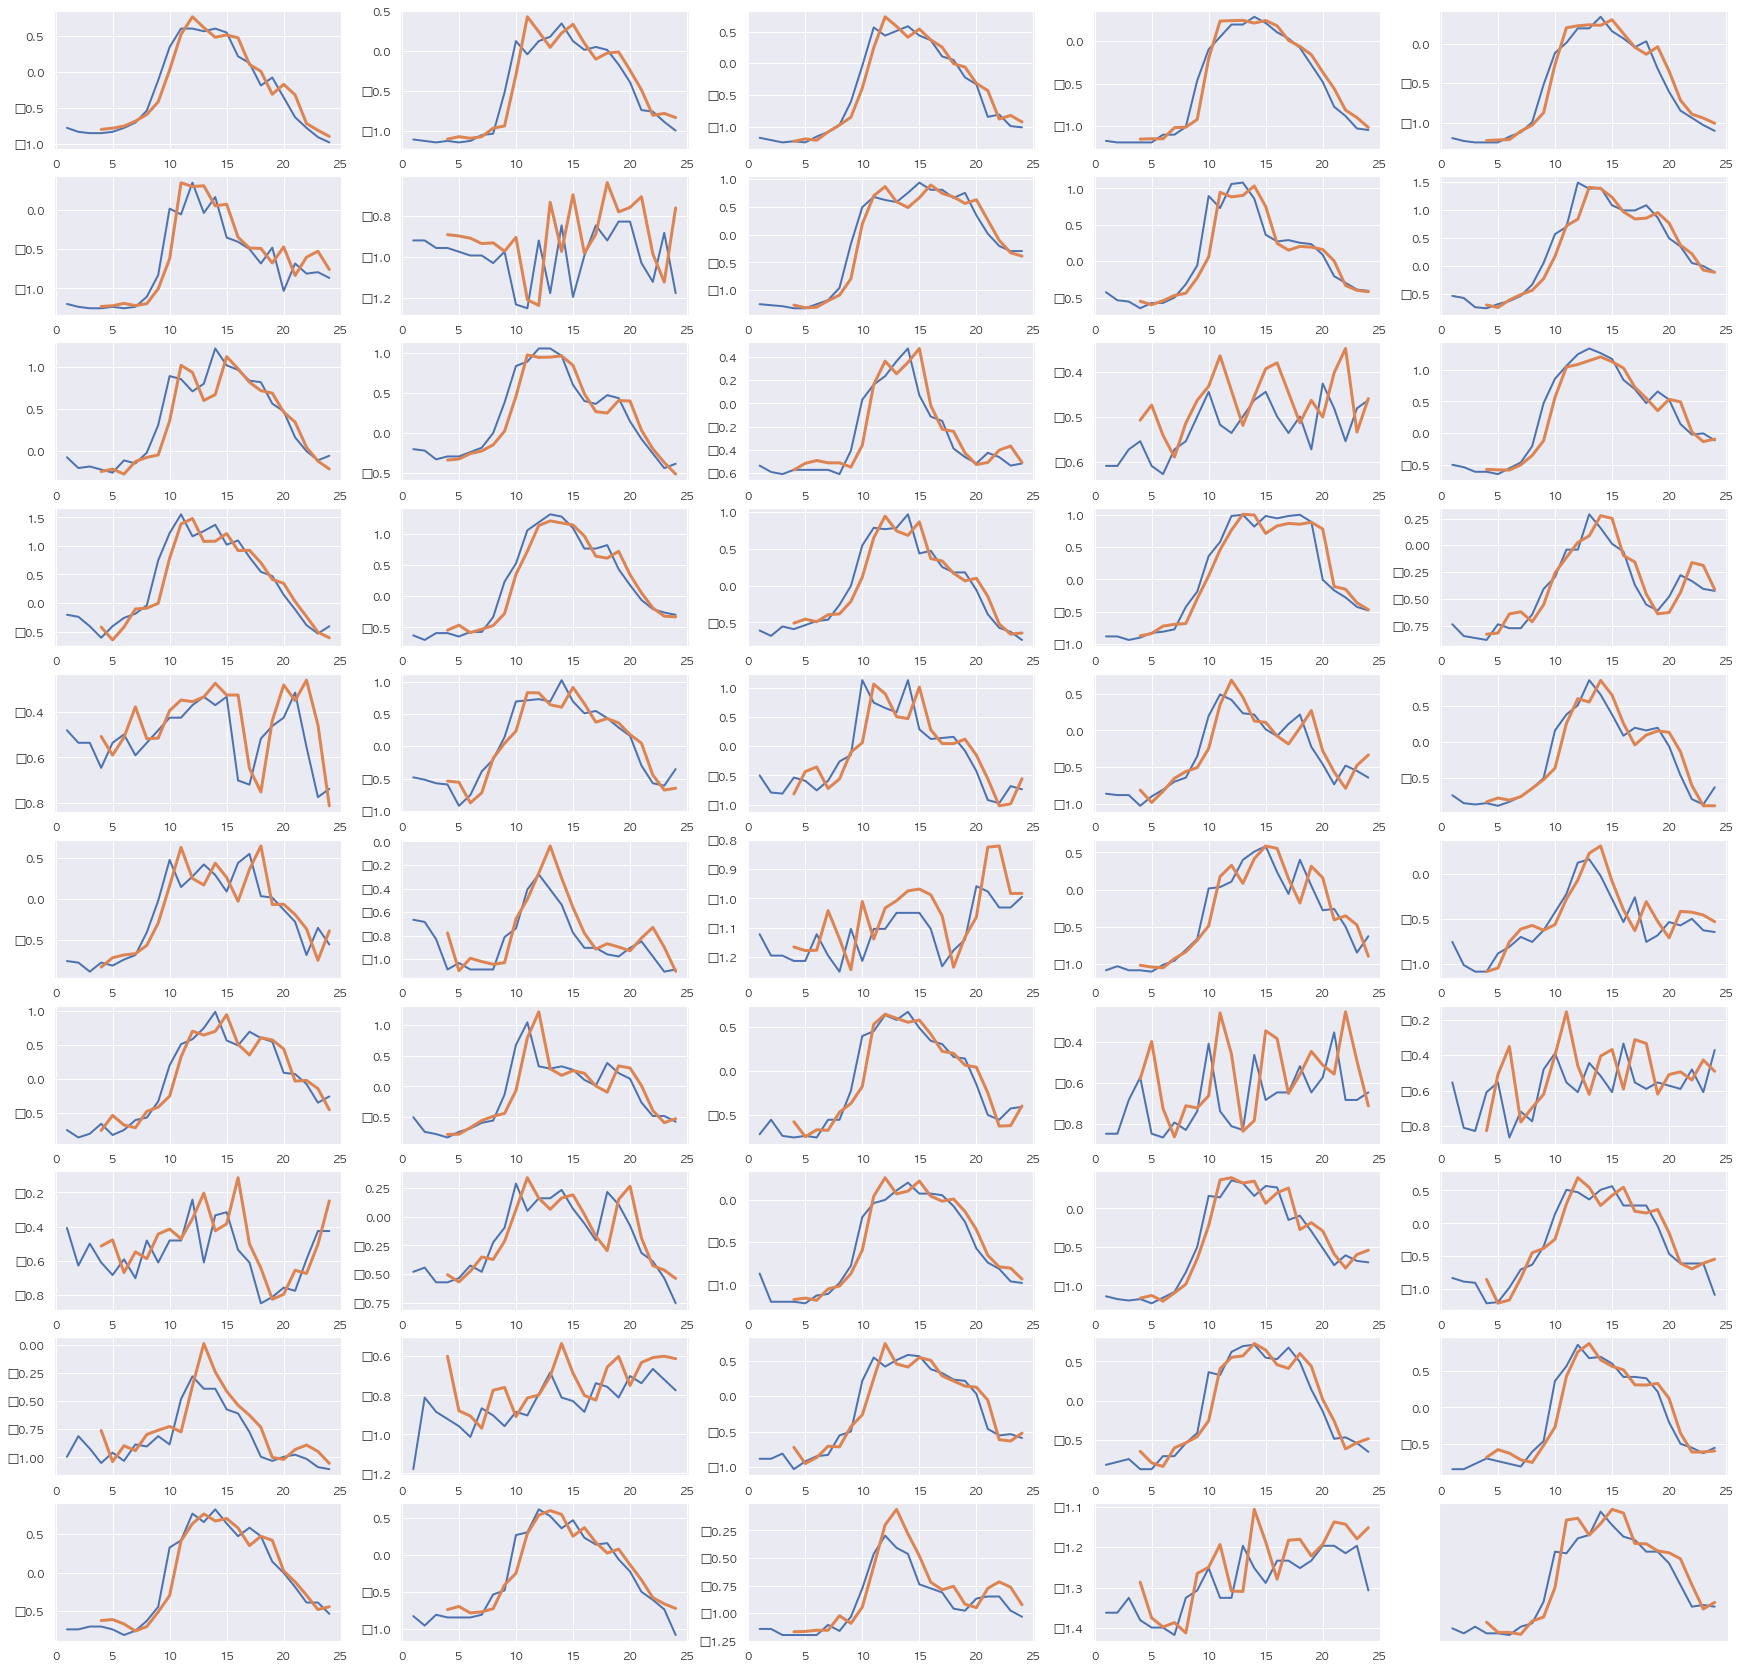

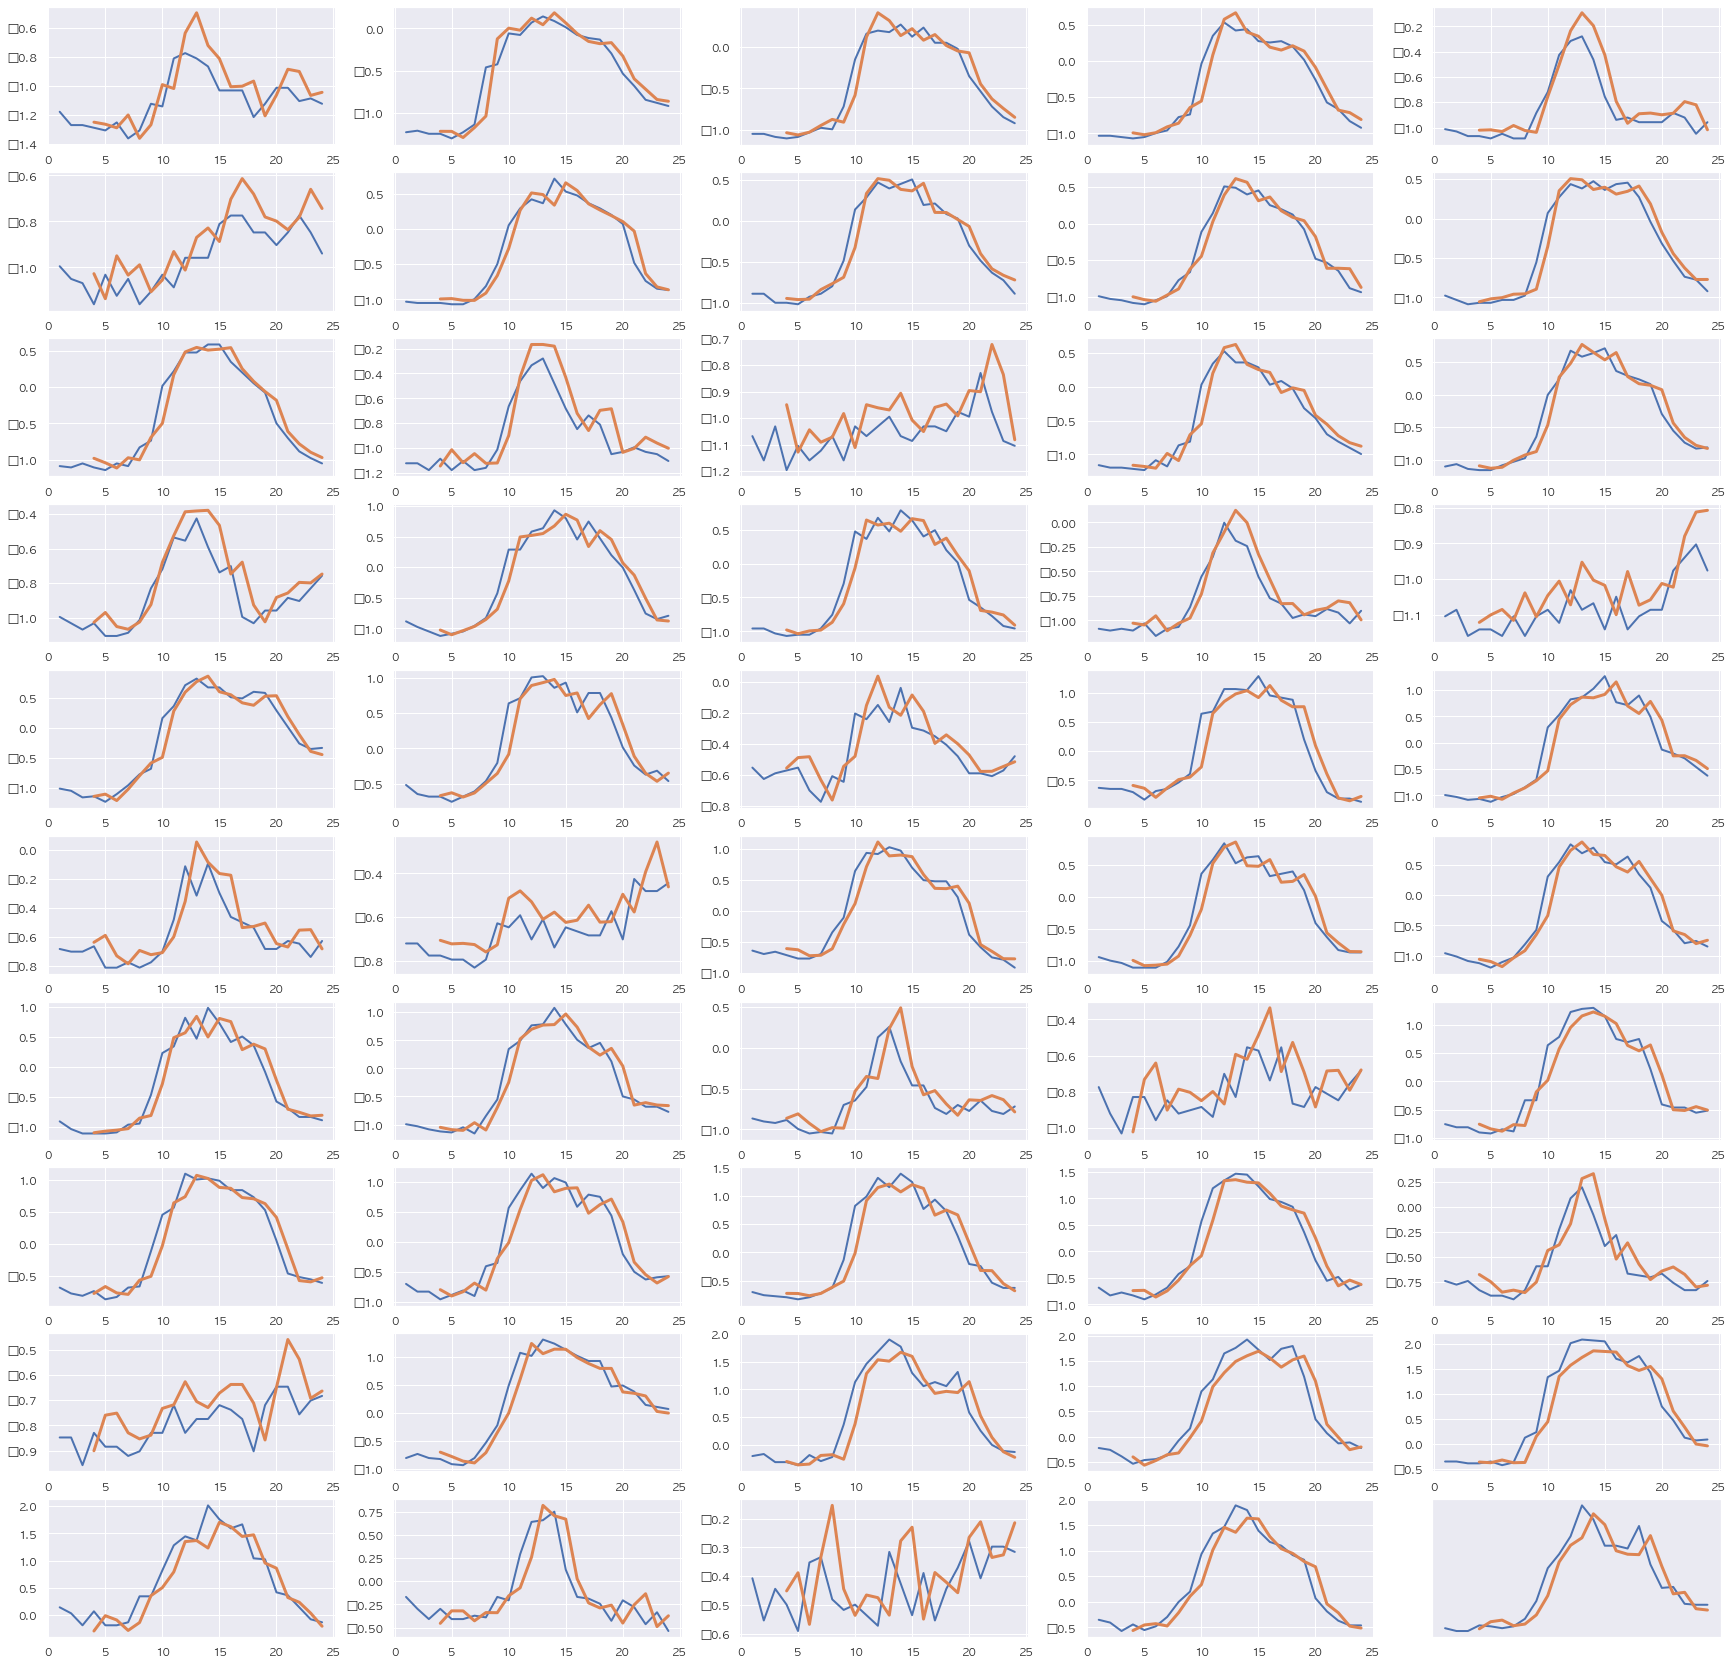

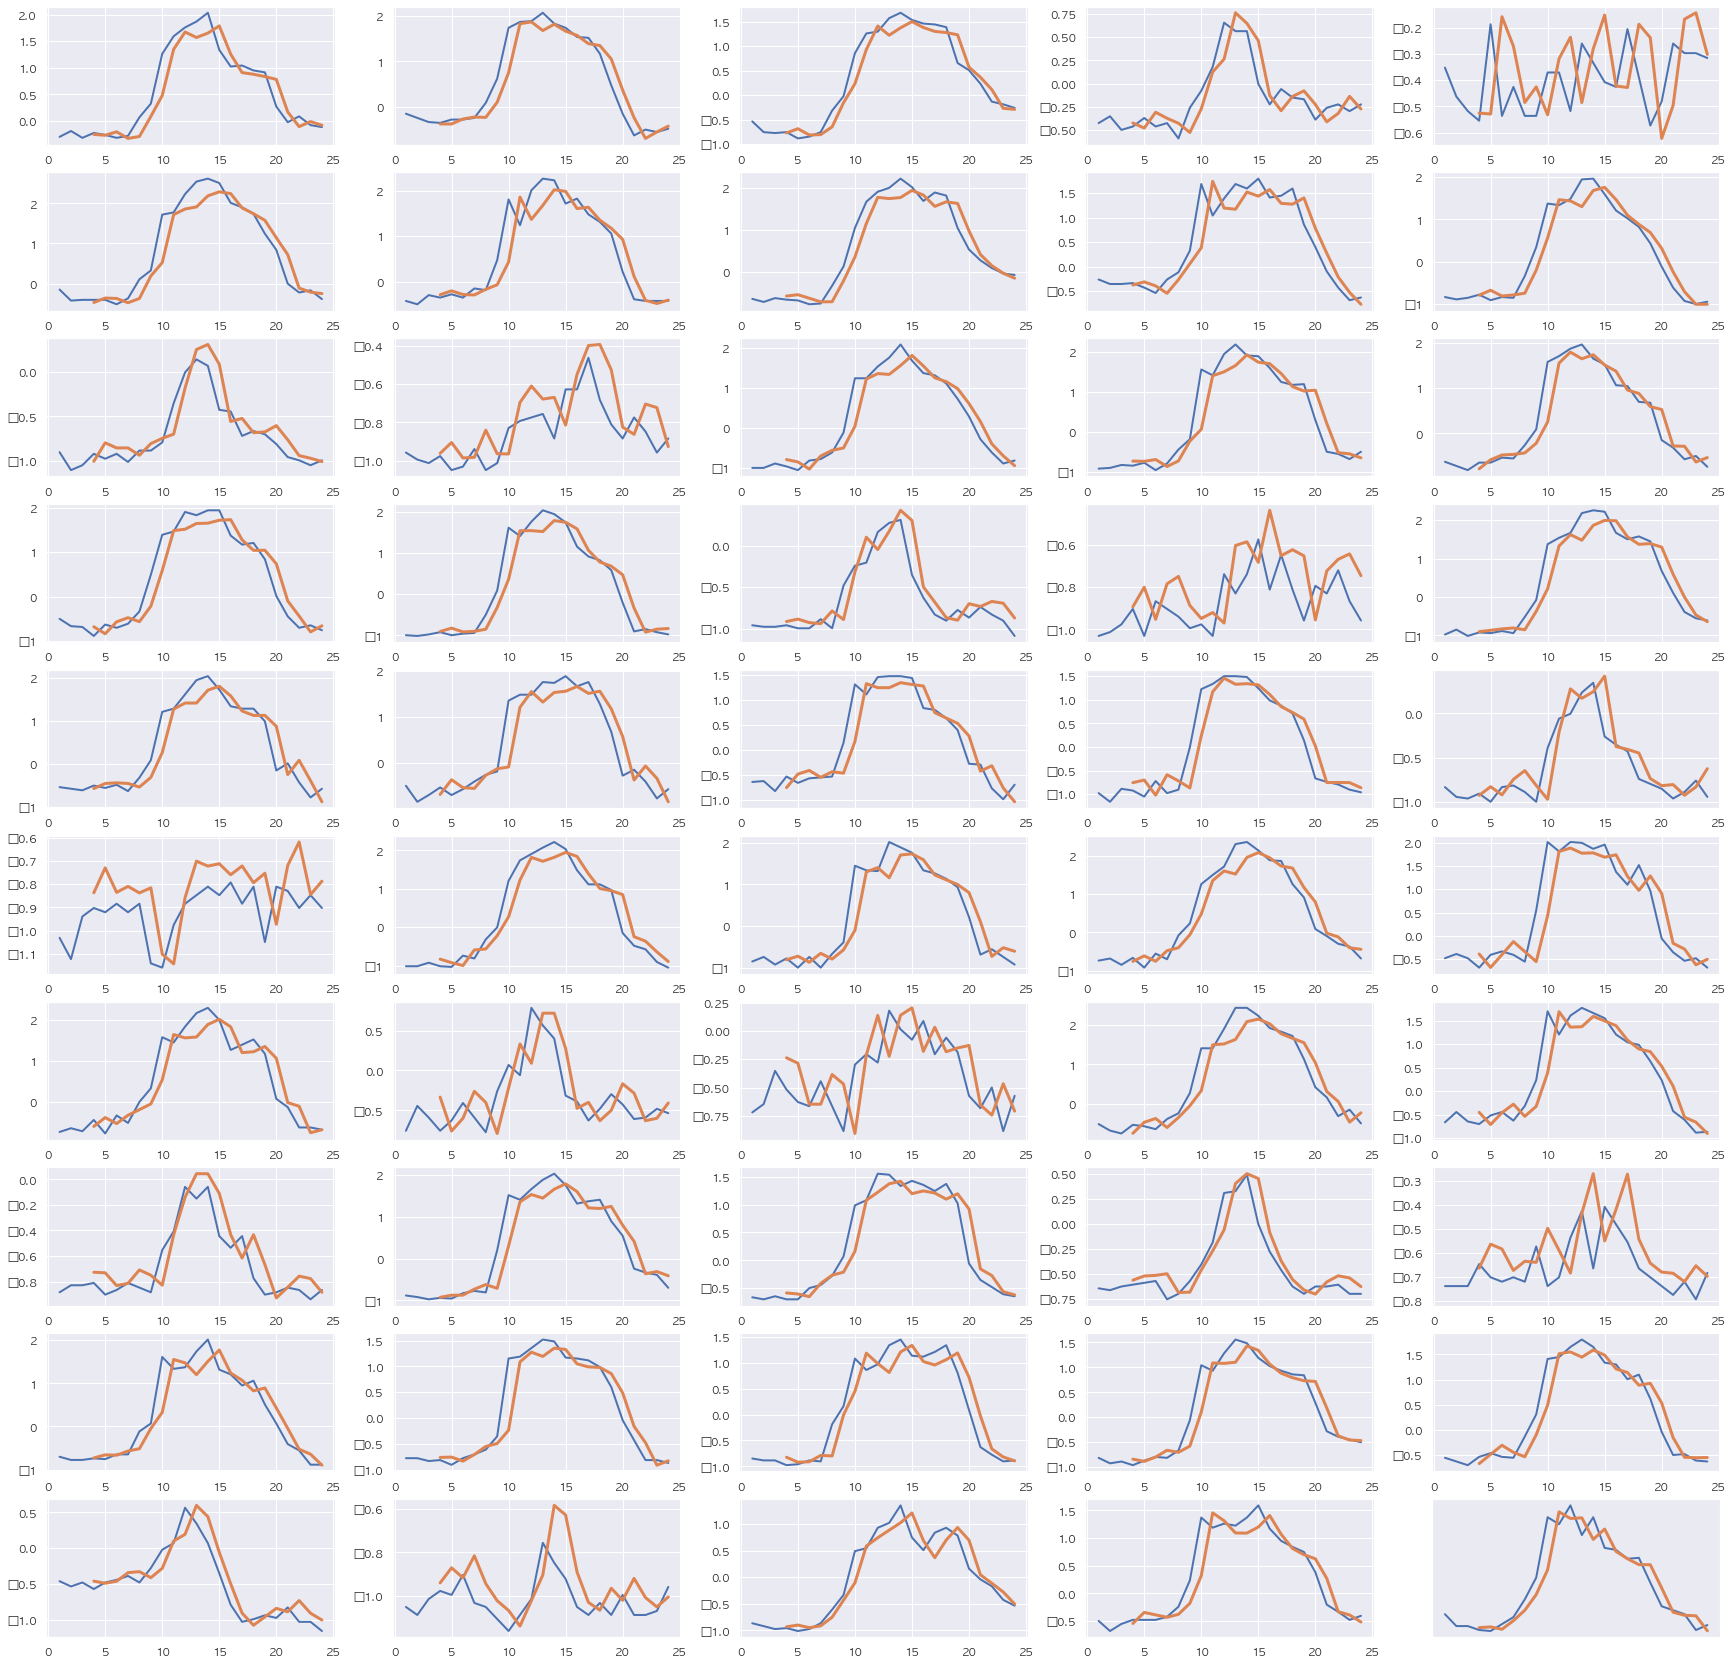

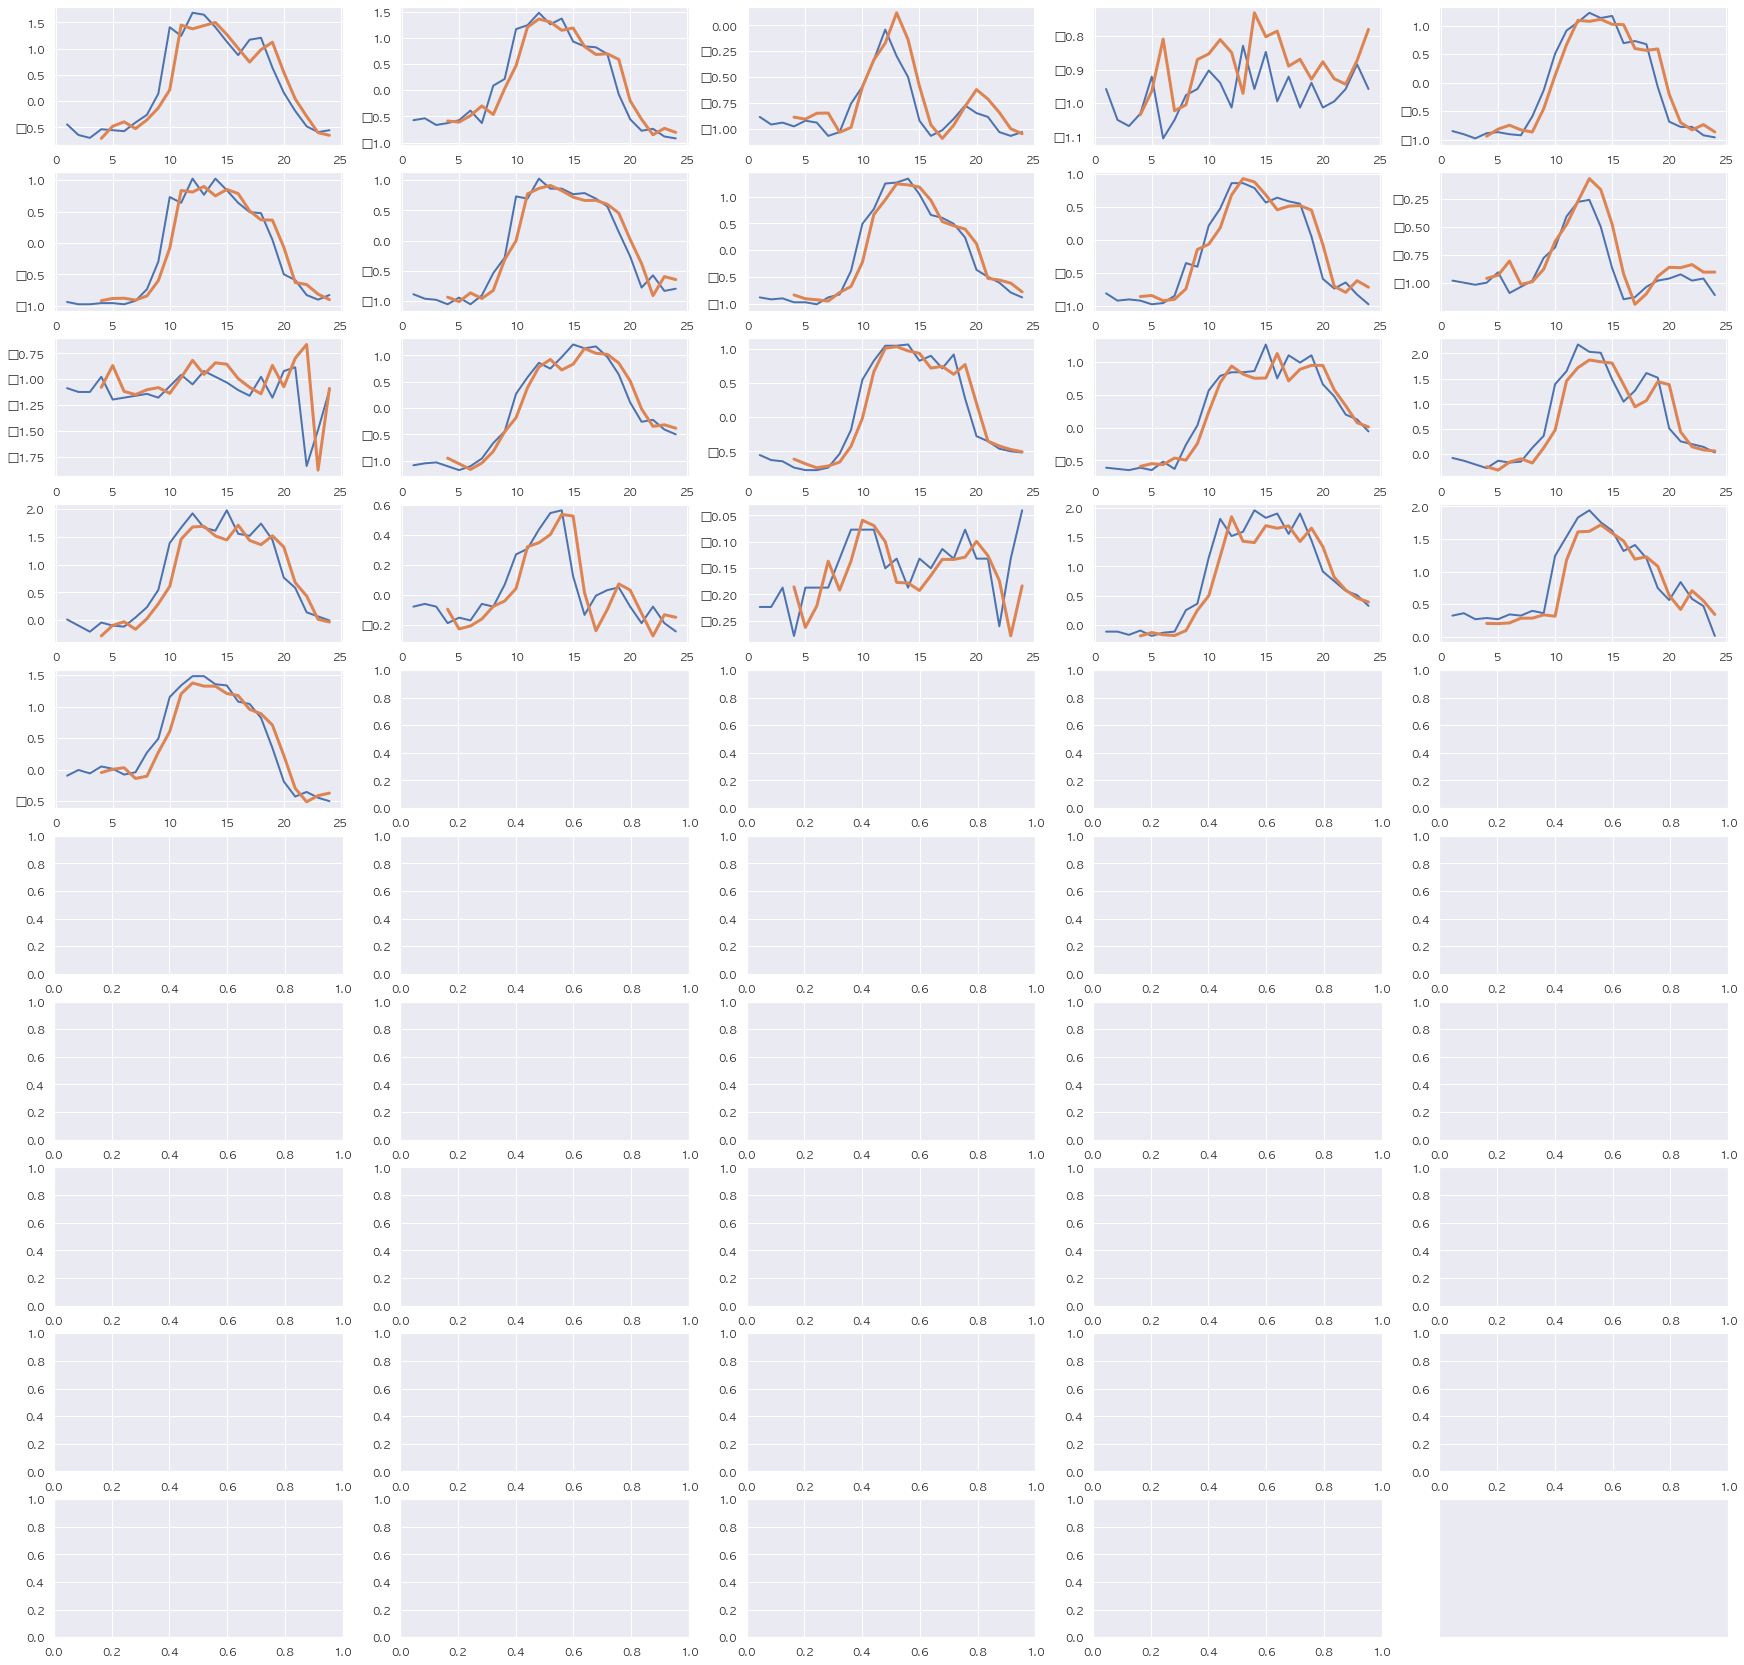

In [14]:
bm.visualization()